__________________________

## Notebook for ImpulsoGOV Data Analysis Case

# Candidate: Fernando Cirone - 16th November 2024
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148)

____________________

## 🚨 TASK 🚨 

### Monitoring User Behavior in the Product

To measure the impact of our solutions, we consider it essential to track the success of the tools we provide to our users (SUS managers and healthcare professionals).

In this case study, we will ask you to perform an exploratory analysis to identify usage patterns and draw conclusions about the engagement with Impulso Previne's main tool: the nominal lists.

The exploration should focus on deriving insights related to the following three points:

- First access rates to the nominal lists; <br>
- Comparison of activity between different user roles/positions; <br>
- Behavioral patterns in the usage of the nominal lists; <br>

### What it' the nominal list?

Nominal lists are tools that consolidate data by individual citizen, indicating the status of appointments, exams, procedures, and other aspects.
They enable actions such as filtering, searching, sorting, and also provide the option to print the list for sharing in PDF format or for use on paper.

### Analysis must contain:

**Explanation of Metrics**: Explain the metrics used for the exploration, including definitions and assumptions adopted.

**Visualizations**: Include at least one visualization to support the conclusions for each of the three points of analysis.

**Conclusions**: Present specific insights for each of the three topics. These conclusions may explore comparisons, variations, patterns in historical data, classification into categories, among other aspects. Focus on up to two conclusions you consider most relevant for each of the three points.

### Data Glossary

usuarios_cadastrados_ip: Contains information about users who registered and can access the logged-in area of the product.

- usuario_id: unique identifier of the user <br>
- data_criacao_cadastro: user registration creation date <br>
- municipio, cargo: user's municipality and role <br>


dias_ativo_usuarios_ip: Data about the days users were active in the logged-in area of the product. Each row represents a day that a user was active on the platform.

- usuario_id: unique identifier of the user <br>
- data_ativo: user activity date <br>
- acessou_listas_nominais: true if the user accessed at least one nominal list <br>
- clicks_imprimir_lista: number of clicks to print a nominal list <br>
- clicks_filtrar_lista: number of clicks to apply a filter to the nominal list <br>

____________________

## Agenda of this notebook:
#### 0 - [Import Python Libraries](#import-python-libraries)  
#### 1 - [Quick analysis of the data](#quick-analysis-of-the-data)  
#### 2 - [Editing: Merging and creating a new DataFrame for first access analysis afterwards](#editing-merging-and-creating-a-new-dataframe-for-first-access-analysis-afterwards)  
#### 3 - [Analysis of the merged dataframe](#analysis-of-the-merged-dataframe)  
#### 4 - [Answering Questions](#answering-questions)


________________________________________________________________________________

<a id="import-python-libraries"></a>

# 0. Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="quick-analysis-of-the-data"></a>

_______________________

# 1. Quick analysis of the data

In [2]:
df1 = pd.read_csv('data/usuarios_cadastrados_ip.csv', delimiter=',')
df1.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023
1,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,24/10/2023


In [3]:
df2 = pd.read_csv('data/dias_ativo_usuarios_ip.csv', delimiter=',')
df2.head(2)

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,dec6bb91-05a8-4709-a7af-ab2aba6d1f3e,18/12/2023,True,0,0
1,0a83d262-3630-41a5-b36f-a48ebe9f80e2,18/12/2023,True,0,0


### As we can see above: there is one key that matches the both dfs: usuario_id - merge both dfs in one to enhance analysis

### But first quick check if there is null or duplicates

### df1

In [4]:
df1.head(1)

,usuario_id,municipio,cargo,data_criacao_cadastro
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023


In [5]:
df1.shape

(695, 4)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   usuario_id             695 non-null    object
 1   municipio              695 non-null    object
 2   cargo                  695 non-null    object
 3   data_criacao_cadastro  695 non-null    object
dtypes: object(4)
memory usage: 21.8+ KB


In [7]:
df1.duplicated().value_counts()

False    695
Name: count, dtype: int64

In [8]:
df1.describe()

,usuario_id,municipio,cargo,data_criacao_cadastro
count,695,695,695,695
unique,695,70,2,106
top,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Itabira - MG,Coordenação de Equipe,16/3/2023
freq,1,38,568,55


In [9]:
df1.isnull().value_counts()

usuario_id  municipio  cargo  data_criacao_cadastro
False       False      False  False                    695
Name: count, dtype: int64

In [10]:
df1.isna().sum()

usuario_id               0
municipio                0
cargo                    0
data_criacao_cadastro    0
dtype: int64

### Conclusion df1: df1 has no null, no duplicated, has 4 features and 695 rows

### df2 analysis:

In [11]:
df2.head(1)

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,dec6bb91-05a8-4709-a7af-ab2aba6d1f3e,18/12/2023,True,0,0


In [12]:
df2.shape

(20777, 5)

In [13]:
df2["acessou_listas_nominais"].value_counts()

acessou_listas_nominais
True     18763
False     2014
Name: count, dtype: int64

In [14]:
df2["clicks_imprimir_lista"].value_counts()

clicks_imprimir_lista
0      18368
1        963
2        468
3        243
4        183
5        112
6         93
7         54
8         43
10        34
11        29
9         29
12        18
17        15
13        15
16        12
14        11
19        10
18         9
21         8
22         8
15         8
20         5
24         5
26         4
34         3
32         3
28         2
31         2
27         2
25         2
49         2
41         1
37         1
53         1
48         1
60         1
55         1
72         1
30         1
234        1
40         1
29         1
38         1
63         1
86         1
Name: count, dtype: int64

In [15]:
df2["clicks_filtrar_lista"].value_counts()

clicks_filtrar_lista
0      17956
1        836
2        481
3        318
4        203
       ...  
249        1
52         1
53         1
87         1
93         1
Name: count, Length: 62, dtype: int64

In [16]:
df2.shape

(20777, 5)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20777 entries, 0 to 20776
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   usuario_id               20777 non-null  object
 1   data_ativo               20777 non-null  object
 2   acessou_listas_nominais  20777 non-null  bool  
 3   clicks_imprimir_lista    20777 non-null  int64 
 4   clicks_filtrar_lista     20777 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 669.7+ KB


In [18]:
df2.duplicated().value_counts()

False    20777
Name: count, dtype: int64

In [19]:
df2.isna().sum()

usuario_id                 0
data_ativo                 0
acessou_listas_nominais    0
clicks_imprimir_lista      0
clicks_filtrar_lista       0
dtype: int64

### Conclusion df2: df2 has no null, no duplicated, has 5 features (1 boolean) and 20.777 rows

### With this conclusion above we can merge the two lists without any concern

<a id="editing-merging-and-creating-a-new-dataframe-for-first-access-analysis-afterwards"></a>

_________________________

# 2. Editing: Merging and creating a new DataFrame for first access analysis afterwards

### Merge !
### We must merge "inner" because we won't use any data with missing info in any of the two dfs.
### and then proceed to deeper analysis: is there any typo, error or trash info in each feature?

In [20]:
df = df1.merge(
                df2,
                left_on="usuario_id", right_on="usuario_id",
                how="inner"
)

df.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,14/2/2024,True,0,2


In [21]:
df.tail(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,4/11/2024,True,0,1
20776,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,14/5/2024,True,0,0


### Before any conclusion, create 2 new features: state e delta_time for better analysis

### State:

In [22]:
df["municipio"][0][-2:]

'SP'

In [23]:
len(df["municipio"])

20777

In [24]:
df["municipio"][100][-2:]

'MA'

In [25]:
df["estado"] = df["municipio"].map(lambda x: x[-2:])
df.head(1)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0,SP


### delta time:

In [26]:
print(df["data_criacao_cadastro"].dtype)
print(df["data_ativo"].dtype)

object
object


### Convert to dates to datetime to get delta_time !

In [27]:
df["data_criacao_cadastro"] = pd.to_datetime(df["data_criacao_cadastro"], dayfirst=True)
df["data_ativo"] = pd.to_datetime(df["data_ativo"], dayfirst=True)

In [28]:
print(df["data_criacao_cadastro"].dtype)
print(df["data_ativo"].dtype)

datetime64[ns]
datetime64[ns]


In [29]:
df["delta_time"] = df["data_ativo"] - df["data_criacao_cadastro"]
df.head(4)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141 days
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328 days
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-12-13,True,0,0,SP,265 days
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-09-05,True,0,0,SP,166 days


### Converting delta time in days for better analysis

In [30]:
df["delta_time"] = df["delta_time"].dt.days

### Ordering the dataframe to create a flag to get only first access!
### Why ? Because the delta time of 2nd, 3rd, etc from the creating login it is not important for the KPI we want to measure

In [31]:
df_ordered = df.sort_values(by=['usuario_id', 'delta_time'])
df_ordered.head(15)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1
13748,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-08,True,0,2,MG,4
13729,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-09,True,0,1,MG,5
13755,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-10,True,0,0,MG,6
13728,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-11,True,0,0,MG,7
13763,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-12,True,0,1,MG,8
13741,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-15,True,0,0,MG,11
13757,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-16,True,0,0,MG,12
13736,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-27,True,0,0,MG,23
13749,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-30,True,0,0,MG,26


In [32]:
#Criando a "mascara"/flag de first access
#Cumcount() >>>> Contagem cumulativa !
df_ordered['first_access'] = df_ordered.groupby('usuario_id').cumcount().apply(lambda x: 1 if x == 0 else 0)
df_ordered.head(5)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
13748,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-08,True,0,2,MG,4,0
13729,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-09,True,0,1,MG,5,0
13755,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-10,True,0,0,MG,6,0
13728,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-11,True,0,0,MG,7,0


In [33]:
df_first_access = df_ordered[df_ordered['first_access'] == 1]

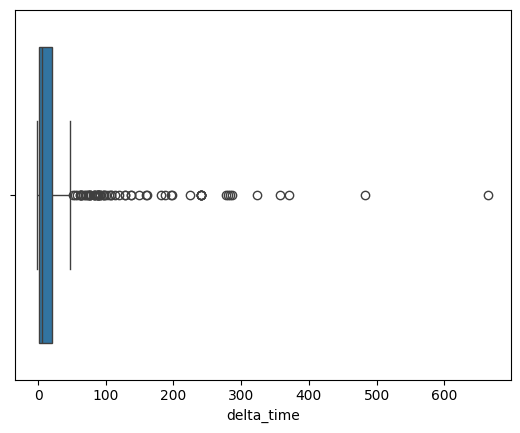

In [34]:
sns.boxplot(x=df_first_access["delta_time"]);

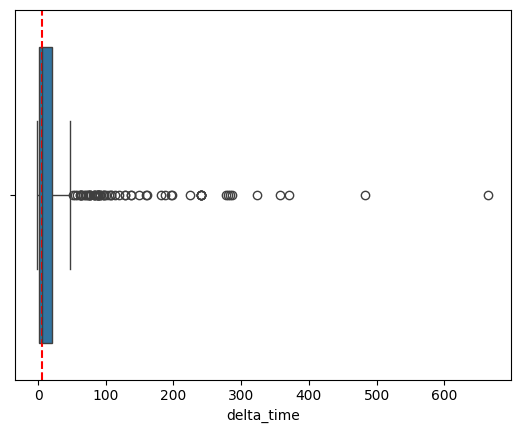

In [35]:
sns.boxplot(x=df_first_access["delta_time"])

plt.axvline(df_first_access["delta_time"].median(), color="red", linestyle="--");

In [36]:
df_first_access["delta_time"].describe()

count    575.000000
mean      25.344348
std       59.865293
min       -1.000000
25%        1.000000
50%        6.000000
75%       21.000000
max      665.000000
Name: delta_time, dtype: float64

### Attention! There is a -1 value, probably some error/typo in the input ! Check out

In [37]:
df_first_access[["data_criacao_cadastro", "data_ativo"]][df_first_access["delta_time"] == -1]

,data_criacao_cadastro,data_ativo
18389,2024-03-19,2024-03-18


### Confirmed ! There is this row that the day active it is before creating the login, ERROR!

In [38]:
#df_first_access["delta_time"] = df_first_access["delta_time"].map(lambda x: 0 if x == -1 else x)
df_first_access.loc[:, "delta_time"] = df_first_access["delta_time"].map(lambda x: 0 if x == -1 else x)

In [39]:
df_first_access[["data_criacao_cadastro", "data_ativo"]][df_first_access["delta_time"] == -1]

,data_criacao_cadastro,data_ativo


### Solved the -1 delta time !

In [40]:
df_first_access.head(5)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1
2739,021f43b9-c167-44b3-bc42-5420212df999,Paes Landim - PI,Coordenação APS,2023-05-09,2023-05-12,True,0,0,PI,3,1


In [41]:
df_first_access["acessou_listas_nominais"].value_counts()

acessou_listas_nominais
True     501
False     74
Name: count, dtype: int64

In [42]:
df_first_access["delta_time"].mean()

np.float64(25.346086956521738)

In [43]:
df_first_access["delta_time"].median()

np.float64(6.0)

In [44]:
df_first_access["delta_time"].mode()

0    1
Name: delta_time, dtype: int64

### Above: Task completed - save for a deep dive into the 3 requests of the task.


<a id="analysis-of-the-merged-dataframe"></a>


________________________

# 3. Analysis of the merged dataframe

In [45]:
df["usuario_id"].nunique()

575

In [46]:
df["estado"].nunique()

17

In [47]:
df["municipio"].nunique()

70

In [48]:
df["cargo"].value_counts()

cargo
Coordenação de Equipe    17601
Coordenação APS           3176
Name: count, dtype: int64

In [49]:
len(df[(df["cargo"] == "Coordenação de Equipe") & (df["acessou_listas_nominais"] == True)]) / len(df[(df["cargo"] == "Coordenação de Equipe")])

0.9069371058462588

In [50]:
len(df[(df["cargo"] == "Coordenação APS") & (df["acessou_listas_nominais"] == True)]) / len(df[(df["cargo"] == "Coordenação APS")])

0.8816120906801007

### Sanity check if there is any typo in NON-acces nominal list & Clicks

In [51]:
df[(df["acessou_listas_nominais"] == False)]["clicks_imprimir_lista"].value_counts()

clicks_imprimir_lista
0    2014
Name: count, dtype: int64

In [52]:
df[(df["acessou_listas_nominais"] == False)]["clicks_filtrar_lista"].value_counts()

clicks_filtrar_lista
0    2014
Name: count, dtype: int64

In [53]:
# df[(df["acessou_listas_nominais"] == True)]["clicks_imprimir_lista"].value_counts().sum()

In [54]:
# df[(df["acessou_listas_nominais"] == True)]["clicks_filtrar_lista"].value_counts().sum()

DataFrame Analysis: <br>
    - Users - How many unique users? 575 unique users; <br>
    - Cities - Are all 5571 cities in Brazil represented? No, 70 cities; <br>
    - States - Are all 26+1 states of Brazil represented? No, 17 states; <br>
    - How many and which positions? There are only 2 positions: Team Coordination and APS Coordination; <br>
    - Mix of users who use the nominal list vs. those who don't: <br>
          - Mix of Team Coordination using the list (of # access): 90% <br>
          - Mix of APS Coordination using the list: (of # access): 88% <br>

<a id="answering-questions"></a>

__________________________

# 4. Answering Questions

### 4.1. First access rates to the nominal lists;:
#### 4.1.1 Dispersion of the time median and mode of first login?
#### 4.1.2 The threshold in days when the probability for NOT USING the product it is greater than 50%?
#### Sugestão: Entendo ser crítico quem demorou mais de 24h para acessar as listas pois cai no esquecimento - nao podemos deixar isso acontecer Criar um sistema automatizado para notificar por e-mail e WhatsApp que a pessoa criou a lista e para acessa-la

In [55]:
df_first_access["delta_time"].describe()

count    575.000000
mean      25.346087
std       59.864541
min        0.000000
25%        1.000000
50%        6.000000
75%       21.000000
max      665.000000
Name: delta_time, dtype: float64

### No problems with the current df that we have created to deepdive into the first access of the nominal lists

In [56]:
df_first_access["delta_time"].median()

np.float64(6.0)

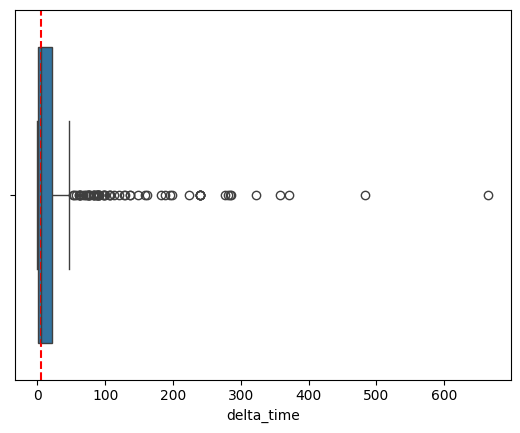

In [57]:
sns.boxplot(x=df_first_access["delta_time"])

plt.axvline(df_first_access["delta_time"].median(), color="red", linestyle="--");

In [58]:
df_first_access["delta_time"].count()

np.int64(575)

In [59]:
df_first_access.head(4)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1


Important: <br>
    - 0 for NON access in nominal list <br>
    - 1 for access YES! <br>

In [60]:
# O que estou fazendo aqui? Transformando o type do acessou as listas em booleano, tirando True e False e criando 1 ou 0
# e fazendo o sanity check se funcionou.
#df["acessou_listas_nominais"] = df["acessou_listas_nominais"].astype(bool)
df_first_access["access_boolean"] = df["acessou_listas_nominais"].apply(lambda x: 1 if x == True else 0)
df_first_access["access_boolean"].unique()

/tmp/ipykernel_2989/4181266748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_access["access_boolean"] = df["acessou_listas_nominais"].apply(lambda x: 1 if x == True else 0)


array([1, 0])

In [61]:
df_first_access.head(7)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access,access_boolean
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1,1
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1,0
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1,1
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1,1
2739,021f43b9-c167-44b3-bc42-5420212df999,Paes Landim - PI,Coordenação APS,2023-05-09,2023-05-12,True,0,0,PI,3,1,1
10873,02dc65f3-341b-454c-a5be-34ffc3d39e3f,Viana - MA,Coordenação de Equipe,2023-03-16,2023-03-17,True,0,0,MA,1,1,1
3223,03529be2-6468-4336-9248-cfe422317088,Afuá - PA,Coordenação de Equipe,2024-04-22,2024-04-22,True,13,16,PA,0,1,1


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [63]:
df_first_access["access_boolean"].value_counts()

access_boolean
1    501
0     74
Name: count, dtype: int64

### Unbalanced dataset, we must rebalance and scale the delta_times (a lot of outliers)

In [64]:
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
df_first_access["delta_time_scaled"] = scaler.fit_transform(df_first_access[["delta_time"]])

/tmp/ipykernel_2989/2570268445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_access["delta_time_scaled"] = scaler.fit_transform(df_first_access[["delta_time"]])


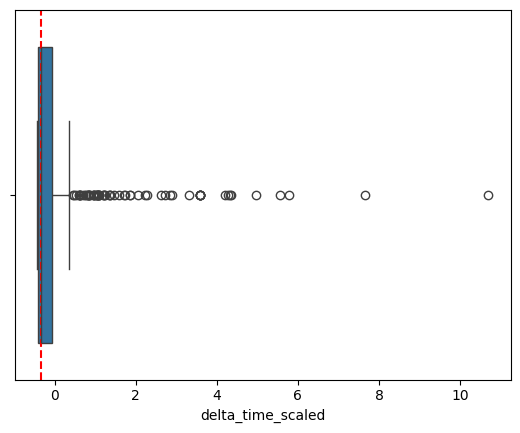

In [65]:
sns.boxplot(x=df_first_access["delta_time_scaled"])

plt.axvline(df_first_access["delta_time_scaled"].median(), color="red", linestyle="--");

In [66]:
#X = df_first_access[["delta_time_scaled"]]
X = df_first_access[["delta_time"]]
y = df_first_access["access_boolean"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [68]:
model = LogisticRegression(class_weight='balanced')
#model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6705202312138728

In [69]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [70]:
proba = model.predict_proba(X_test)
print(proba)

[[0.50002844 0.49997156]
 [0.49989213 0.50010787]
 [0.49983473 0.50016527]
 [0.50081048 0.49918952]
 [0.50007149 0.49992851]
 [0.49992082 0.50007918]
 [0.50045175 0.49954825]
 [0.49996387 0.50003613]
 [0.4998993  0.5001007 ]
 [0.49985625 0.50014375]
 [0.49982755 0.50017245]
 [0.50014324 0.49985676]
 [0.50041587 0.49958413]
 [0.49996387 0.50003613]
 [0.4999567  0.5000433 ]
 [0.49997822 0.50002178]
 [0.49983473 0.50016527]
 [0.49983473 0.50016527]
 [0.49982755 0.50017245]
 [0.49986343 0.50013657]
 [0.4998419  0.5001581 ]
 [0.49997105 0.50002895]
 [0.49988495 0.50011505]
 [0.49985625 0.50014375]
 [0.499928   0.500072  ]
 [0.49982755 0.50017245]
 [0.49984908 0.50015092]
 [0.50027956 0.49972044]
 [0.4998419  0.5001581 ]
 [0.50068851 0.49931149]
 [0.49985625 0.50014375]
 [0.49982755 0.50017245]
 [0.4998419  0.5001581 ]
 [0.50007867 0.49992133]
 [0.49993517 0.50006483]
 [0.49985625 0.50014375]
 [0.49984908 0.50015092]
 [0.49999975 0.50000025]
 [0.49982755 0.50017245]
 [0.49982755 0.50017245]


In [71]:
proba_acess = proba[:,1]
proba_acess

array([0.49997156, 0.50010787, 0.50016527, 0.49918952, 0.49992851,
       0.50007918, 0.49954825, 0.50003613, 0.5001007 , 0.50014375,
       0.50017245, 0.49985676, 0.49958413, 0.50003613, 0.5000433 ,
       0.50002178, 0.50016527, 0.50016527, 0.50017245, 0.50013657,
       0.5001581 , 0.50002895, 0.50011505, 0.50014375, 0.500072  ,
       0.50017245, 0.50015092, 0.49972044, 0.5001581 , 0.49931149,
       0.50014375, 0.50017245, 0.5001581 , 0.49992133, 0.50006483,
       0.50014375, 0.50015092, 0.50000025, 0.50017245, 0.50017245,
       0.49957695, 0.5001581 , 0.50017245, 0.50002178, 0.49993568,
       0.49999308, 0.49992851, 0.5001581 , 0.50006483, 0.50011505,
       0.50007918, 0.49940476, 0.50015092, 0.49976349, 0.50000743,
       0.50016527, 0.5001581 , 0.49972044, 0.5001007 , 0.50011505,
       0.5001581 , 0.5000433 , 0.49962   , 0.50016527, 0.50017245,
       0.50012222, 0.50016527, 0.49751068, 0.50009353, 0.50017245,
       0.5001581 , 0.50017245, 0.50009353, 0.49936171, 0.49998

In [72]:
intercept = model.intercept_
coef = model.coef_
print(intercept)
print(coef)

[0.00068978]
[[-2.86985365e-05]]


### As we can see above, the coef is negative: more X (days), more the probability that the product will not be access

In [73]:
limit_50 = intercept / coef
limit_50 = limit_50 *-1
limit_50 = limit_50[0][0]
print(limit_50)

24.035516582851617


In [74]:
values = np.linspace(X_test.min(), X_test.max(), 10).reshape(-1, 1)
probabilities = model.predict_proba(values)[:, 1]

/home/fernando_cir/.pyenv/versions/3.10.6/envs/sus/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


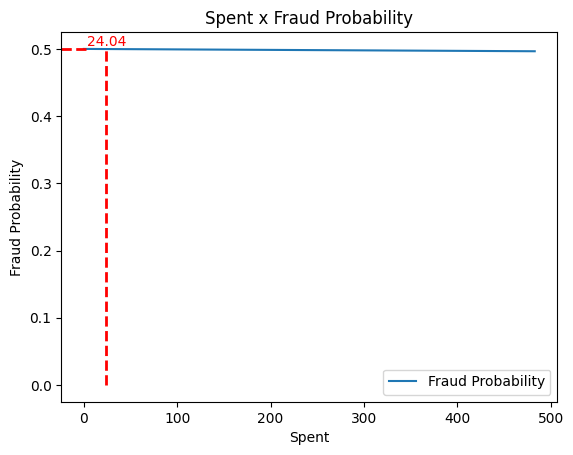

In [75]:
plt.plot(values, probabilities, label="Fraud Probability")
plt.plot([limit_50, limit_50], [0, 0.5], color='red', linestyle='dashed', linewidth=2)
plt.axhline(y=0.5, xmax=limit_50 / values.max(), color='red', linestyle='dashed', linewidth=2)
plt.text(limit_50, 0.5, f'{limit_50:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.xlabel("Spent")
plt.ylabel("Fraud Probability")
plt.title("Spent x Fraud Probability")
plt.legend()
plt.show()

In [76]:
# values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# probabilities = model.predict_proba(values)[:, 1]

X_limited = X[X <= 100]  # Limitando X até no máximo 100
values = np.linspace(X_limited.min(), X_limited.max(), 100).reshape(-1, 1)

probabilities = model.predict_proba(values)[:, 0]  # P(Y = 0)


/home/fernando_cir/.pyenv/versions/3.10.6/envs/sus/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


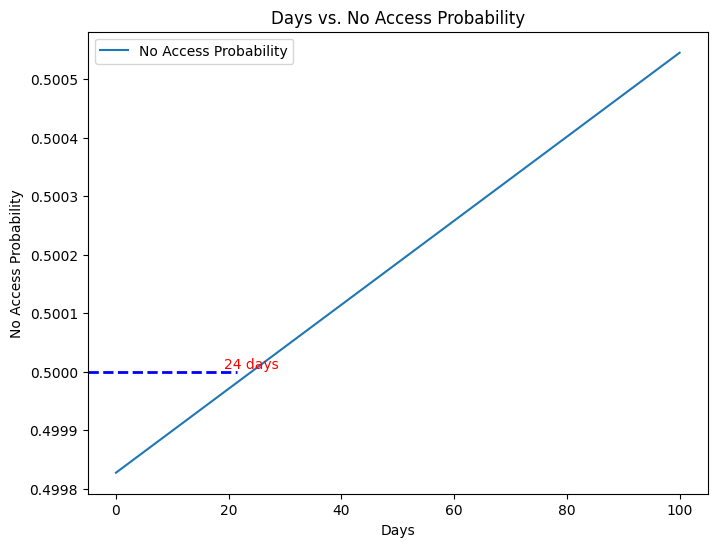

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(values, probabilities, label="No Access Probability")
#plt.axvline(x=limit_50, color='red', linestyle='dashed', linewidth=2, label=f"Threshold ({limit_50} days)")
plt.axhline(y=0.5, xmax=limit_50 / values.max(), color='blue', linestyle='dashed', linewidth=2)
plt.text(limit_50, 0.5, f'{limit_50:.0f} days', color='red', fontsize=10, ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel("Days")
plt.ylabel("No Access Probability")
plt.title("Days vs. No Access Probability")
plt.legend()
plt.show()

In [78]:
print(values)

[[  0.        ]
 [  1.01010101]
 [  2.02020202]
 [  3.03030303]
 [  4.04040404]
 [  5.05050505]
 [  6.06060606]
 [  7.07070707]
 [  8.08080808]
 [  9.09090909]
 [ 10.1010101 ]
 [ 11.11111111]
 [ 12.12121212]
 [ 13.13131313]
 [ 14.14141414]
 [ 15.15151515]
 [ 16.16161616]
 [ 17.17171717]
 [ 18.18181818]
 [ 19.19191919]
 [ 20.2020202 ]
 [ 21.21212121]
 [ 22.22222222]
 [ 23.23232323]
 [ 24.24242424]
 [ 25.25252525]
 [ 26.26262626]
 [ 27.27272727]
 [ 28.28282828]
 [ 29.29292929]
 [ 30.3030303 ]
 [ 31.31313131]
 [ 32.32323232]
 [ 33.33333333]
 [ 34.34343434]
 [ 35.35353535]
 [ 36.36363636]
 [ 37.37373737]
 [ 38.38383838]
 [ 39.39393939]
 [ 40.4040404 ]
 [ 41.41414141]
 [ 42.42424242]
 [ 43.43434343]
 [ 44.44444444]
 [ 45.45454545]
 [ 46.46464646]
 [ 47.47474747]
 [ 48.48484848]
 [ 49.49494949]
 [ 50.50505051]
 [ 51.51515152]
 [ 52.52525253]
 [ 53.53535354]
 [ 54.54545455]
 [ 55.55555556]
 [ 56.56565657]
 [ 57.57575758]
 [ 58.58585859]
 [ 59.5959596 ]
 [ 60.60606061]
 [ 61.61616162]
 [ 62.62

In [79]:
print(probabilities)

[0.49982755 0.4998348  0.49984205 0.4998493  0.49985654 0.49986379
 0.49987104 0.49987828 0.49988553 0.49989278 0.49990003 0.49990727
 0.49991452 0.49992177 0.49992901 0.49993626 0.49994351 0.49995075
 0.499958   0.49996525 0.4999725  0.49997974 0.49998699 0.49999424
 0.50000148 0.50000873 0.50001598 0.50002323 0.50003047 0.50003772
 0.50004497 0.50005221 0.50005946 0.50006671 0.50007396 0.5000812
 0.50008845 0.5000957  0.50010294 0.50011019 0.50011744 0.50012469
 0.50013193 0.50013918 0.50014643 0.50015367 0.50016092 0.50016817
 0.50017542 0.50018266 0.50018991 0.50019716 0.5002044  0.50021165
 0.5002189  0.50022614 0.50023339 0.50024064 0.50024789 0.50025513
 0.50026238 0.50026963 0.50027687 0.50028412 0.50029137 0.50029862
 0.50030586 0.50031311 0.50032036 0.5003276  0.50033485 0.5003421
 0.50034935 0.50035659 0.50036384 0.50037109 0.50037833 0.50038558
 0.50039283 0.50040008 0.50040732 0.50041457 0.50042182 0.50042906
 0.50043631 0.50044356 0.5004508  0.50045805 0.5004653  0.500472

### Analysis: 24 days seems to be a lot for >50% prob not to use the product. Hypotesis: outliers and/or few data.
### Since this is an Data Analytics Task I will remain without treating the 

### 4.2. Comparison of activity between different user roles/positions:
#### 4.2.1 Overall info of the "Coordenador de Equipe" role;
#### 4.2.2 Overall info of the "Coordenador de APS" role;

In [139]:
df.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [140]:
df["cargo"].unique()

array(['Coordenação de Equipe', 'Coordenação APS'], dtype=object)

### Analysis of "Coordenador de Equipe" role

### Total Unique Users:

In [141]:
tot_coord_eq = df[df["cargo"] == "Coordenação de Equipe"]["usuario_id"].nunique()
tot_coord_eq

475

In [142]:
df["cargo"].value_counts()

cargo
Coordenação de Equipe    17601
Coordenação APS           3176
Name: count, dtype: int64

In [143]:
unique_user_per_cargo = df.groupby("cargo")["usuario_id"].nunique()
unique_user_per_cargo

cargo
Coordenação APS          100
Coordenação de Equipe    475
Name: usuario_id, dtype: int64

### Unique users who did used the nominal list and didn't

In [88]:
list_eq_nom_true = df[(df["cargo"] == "Coordenação de Equipe") & (df["acessou_listas_nominais"] == True)]["usuario_id"].nunique()
list_eq_nom_true

466

In [144]:
list_eq_nom_false = df[(df["cargo"] == "Coordenação de Equipe") & (df["acessou_listas_nominais"] == False)]["usuario_id"].nunique()
list_eq_nom_false

314

### Of those who used the list, how are the clicks distributed?

In [145]:
cliques_eq = df[(df["cargo"] == "Coordenação de Equipe") & (df["acessou_listas_nominais"] == True)]
cliques_eq.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [146]:
eq_impri = cliques_eq["clicks_imprimir_lista"].sum()
eq_impri

np.int64(6916)

In [147]:
eq_fil = cliques_eq["clicks_filtrar_lista"].sum()
eq_fil

np.int64(9360)

In [148]:
eq_tot = eq_impri + eq_fil
eq_tot

np.int64(16276)

In [ ]:
print(f'Imprimir {int(eq_impri/eq_tot * 100)} %')
print(f'Filtro {int(eq_fil/eq_tot * 100)} %')

Imprimir 42 %
Filtro 57 %


### Click / UU

In [156]:
eq_click_uu = eq_tot / list_eq_nom_true
eq_click_uu

np.float64(34.927038626609445)

### Time for First Access

In [157]:
df_first_access.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access,access_boolean,delta_time_scaled
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1,1,-0.407040
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1,0,-0.423759


In [158]:
df_first_access

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access,access_boolean,delta_time_scaled
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1,1,-0.407040
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1,0,-0.423759
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1,1,-0.407040
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1,1,-0.089381
2739,021f43b9-c167-44b3-bc42-5420212df999,Paes Landim - PI,Coordenação APS,2023-05-09,2023-05-12,True,0,0,PI,3,1,1,-0.373603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15568,feb83ec6-80af-4e84-a3dd-78a6e94964ef,Jacobina - BA,Coordenação de Equipe,2023-04-04,2023-04-12,True,0,0,BA,8,1,1,-0.290008
17820,fed22165-9980-4358-a2cf-11c427109931,Tarrafas - CE,Coordenação de Equipe,2023-04-04,2023-04-04,True,0,0,CE,0,1,1,-0.423759
11211,fef05bde-262a-4edf-bc6a-dc0ff74ac59e,Minas Novas - MG,Coordenação de Equipe,2024-03-18,2024-03-22,True,0,0,MG,4,1,1,-0.356884
5837,ff217f06-a074-411d-b969-8d8693ca3c82,Brasiléia - AC,Coordenação APS,2023-11-28,2023-11-30,True,0,0,AC,2,1,1,-0.390321


In [159]:
access_eq = df_first_access[df_first_access["cargo"] == "Coordenação de Equipe"]["delta_time"]
access_eq.median()

np.float64(7.0)

In [99]:
access_eq.mode()

0    1
Name: delta_time, dtype: int64

### Region Analysis

In [161]:
cliques_eq.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [162]:
cliques_eq["total_click"] = cliques_eq["clicks_imprimir_lista"] + cliques_eq["clicks_filtrar_lista"]
cliques_eq.head(2)

/tmp/ipykernel_2989/2701436224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliques_eq["total_click"] = cliques_eq["clicks_imprimir_lista"] + cliques_eq["clicks_filtrar_lista"]


,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [163]:
#a = cliques_eq["total_click"].groupby("estado")["total_click"].count()
a = cliques_eq.groupby("estado")["total_click"].sum().sort_values(ascending=False)
a

estado
MG    4135
MA    2933
BA    1457
RS    1111
PI    1027
SP    1024
CE     855
PE     836
RN     565
PA     509
AC     399
GO     398
RR     379
AP     314
SC     158
PB     150
PR      26
Name: total_click, dtype: int64

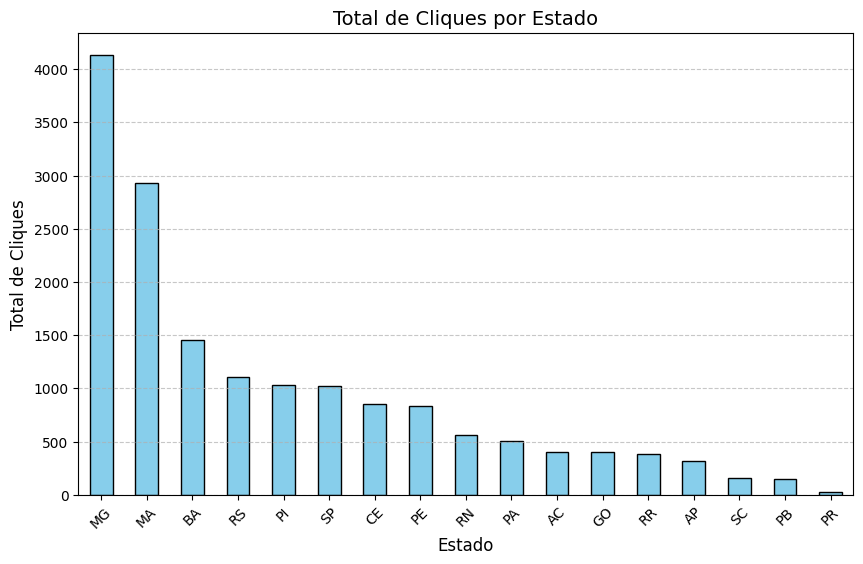

In [164]:
plt.figure(figsize=(10, 6))
a.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total de Cliques por Estado", fontsize=14)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Total de Cliques", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Analysis "Coordenação APS" Role

### Who used the List and who didn't

In [165]:
list_aps_nom_true = df[(df["cargo"] == "Coordenação APS") & (df["acessou_listas_nominais"] == True)]["usuario_id"].nunique()
list_aps_nom_true

99

In [166]:
list_aps_nom_false = df[(df["cargo"] == "Coordenação APS") & (df["acessou_listas_nominais"] == False)]["usuario_id"].nunique()
list_aps_nom_false

77

### From who used the lists: Clicks?

In [167]:
cliques_aps = df[(df["cargo"] == "Coordenação APS") & (df["acessou_listas_nominais"] == True)]
cliques_aps.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
51,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,2023-10-24,2024-01-15,True,0,0,AC,83,0
53,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,2023-10-24,2024-04-24,True,0,0,AC,183,0


In [177]:
aps_impri_click = cliques_aps["clicks_imprimir_lista"].sum()
aps_impri_click

np.int64(2760)

In [178]:
aps_fil_click = cliques_aps["clicks_filtrar_lista"].sum()
aps_fil_click

np.int64(6585)

In [179]:
aps_total_click = cliques_aps["clicks_imprimir_lista"].sum() + cliques_aps["clicks_filtrar_lista"].sum()
aps_total_click

np.int64(9345)

In [176]:
print(f'Imprimir {int(aps_impri_click/aps_total_click * 100)} %')
print(f'Filtro {int(aps_fil_click/aps_total_click * 100)} %')

Imprimir 29 %
Filtro 70 %


### Click / UU

In [180]:
click_uu_aps = aps_total_click / list_aps_nom_true
click_uu_aps

np.float64(94.39393939393939)

### First Access

In [115]:
access_aps = df_first_access[df_first_access["cargo"] == "Coordenação APS"]["delta_time"]
access_aps.median()

np.float64(3.0)

In [116]:
access_aps.mode()

0    0
Name: delta_time, dtype: int64

### Region Analisys 

In [118]:
cliques_aps["total_click"] = cliques_aps["clicks_imprimir_lista"] + cliques_aps["clicks_filtrar_lista"]
cliques_aps.head(2)

/tmp/ipykernel_2989/2026353692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliques_aps["total_click"] = cliques_aps["clicks_imprimir_lista"] + cliques_aps["clicks_filtrar_lista"]


,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
51,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,2023-10-24,2024-01-15,True,0,0,AC,83,0
53,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,2023-10-24,2024-04-24,True,0,0,AC,183,0


In [119]:
b = cliques_aps.groupby("estado")["total_click"].sum().sort_values(ascending=False)
b

estado
MA    2205
BA    1575
SP    1358
PA    1271
PB     532
MG     483
PE     479
AC     347
RR     285
PI     211
CE     198
SC     146
RN     105
GO      75
RS      45
AP      28
PR       2
Name: total_click, dtype: int64

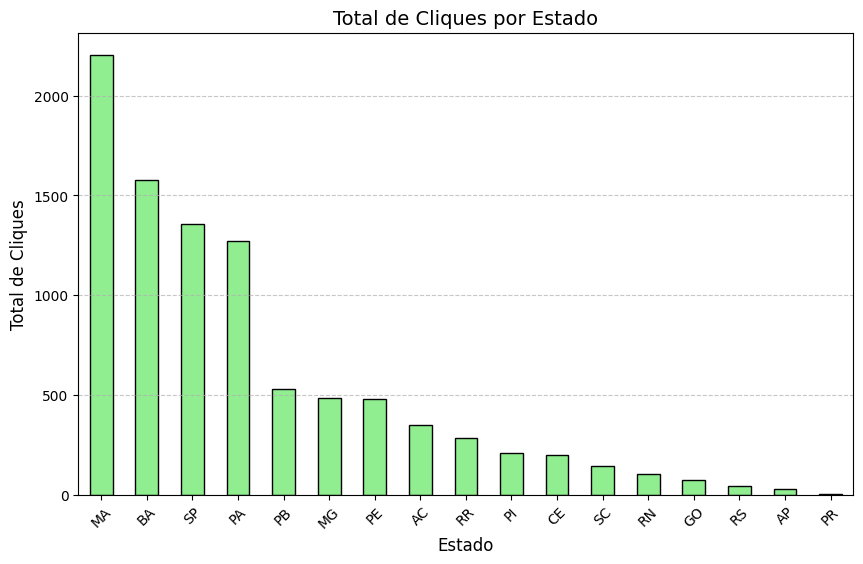

In [120]:
plt.figure(figsize=(10, 6))
b.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Total de Cliques por Estado", fontsize=14)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Total de Cliques", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 4.3. Behavioral patterns in the usage of the nominal lists;
#### 4.3.1 Quantos cliques (seja imprimir ou ) o cara que fez cadastro ha 24 fez ao longo de todas as jornadas?
#### 4.3.2 Baixo custo e alto impacto: quem está acessando as listas nominais e está fazendo 0 clique?
####  Correlação de Cliques por tempo de criação de perfil

#### Correlação de Cliques por tempo de criação de perfil
#### Sugestão: xxx

In [121]:
#Top 10 usuários unicos que estão acessando as listas nominais e fazendo

In [122]:
#Qual a distribuição estatística dos cliques de usuários únicos que acessou as listas nominais e clicou?

In [ ]:
#Creating a new feature (total clicks) in the original dataframe to deepdive analysis
df["total_click"] = df["clicks_imprimir_lista"] + df["clicks_filtrar_lista"]
df.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [ ]:
#Creating a new dataframe to get only who accessed the nominal lists to understand the clicks
click = df[df["acessou_listas_nominais"] == True]
click.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,total_click
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328,2


In [ ]:
#Creating a new dataframe from the just above to get only the total click (summirized) from each usuario_id
click_filtered = click.groupby("usuario_id")["total_click"].sum().sort_values(ascending=False)
click_filtered.head(5)

usuario_id
462377af-9eda-4aa2-ac24-82af7f3add53    966
f82dccb9-8e75-48a5-9985-27cf06084c42    940
77987238-86a0-44e7-ab45-f24f81e70eac    822
e27189a0-15ba-4351-8f7f-d73b6636c735    688
c56b4dbd-ee11-4b5c-928f-f2ca24d46013    542
Name: total_click, dtype: int64

In [126]:
click_filtered.tail(5)

usuario_id
02dc65f3-341b-454c-a5be-34ffc3d39e3f    0
feb83ec6-80af-4e84-a3dd-78a6e94964ef    0
feafe49c-7a19-4ebe-a606-4a7f4ce0e8ed    0
021f43b9-c167-44b3-bc42-5420212df999    0
fed22165-9980-4358-a2cf-11c427109931    0
Name: total_click, dtype: int64

### Understanding the mean of clicks (of those who accessed and clicked)

In [190]:
len(click_filtered)

565

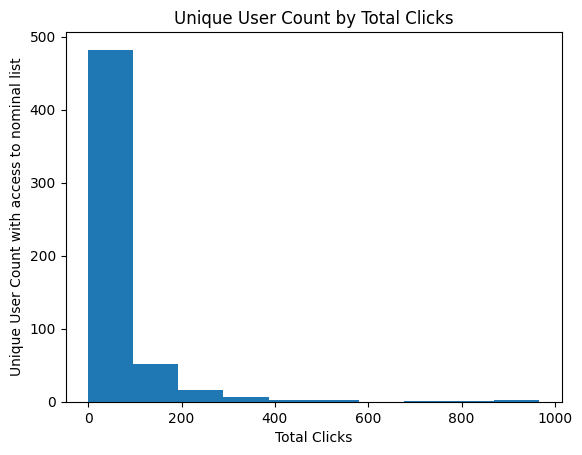

In [203]:
plt.hist(x=click_filtered)
plt.title("Unique User Count by Total Clicks")
plt.xlabel("Total Clicks")
plt.ylabel("Unique User Count with access to nominal list");

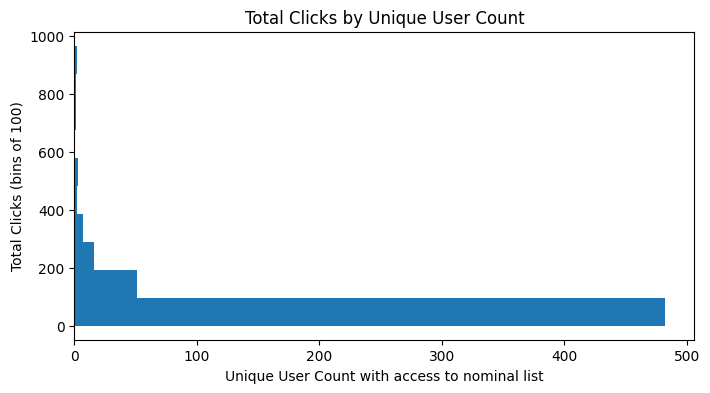

In [233]:
plt.figure(figsize=(8, 4))
plt.hist(x=click_filtered, orientation="horizontal")
plt.yticks()
plt.title("Total Clicks by Unique User Count")
plt.xlabel("Unique User Count with access to nominal list")
plt.ylabel("Total Clicks (bins of 100)");

In [127]:
click_filtered_nonzero = click_filtered.loc[click_filtered > 0]

In [128]:
click_filtered_nonzero.mean()

np.float64(64.0525)

In [129]:
click_filtered_nonzero.median()

np.float64(22.0)

In [130]:
click_filtered_nonzero.mode()

0    1
Name: total_click, dtype: int64

In [131]:
click_filtered_nonzero.count()

np.int64(400)

In [132]:
len(click_filtered_nonzero)

400

### Are there users who accessed the list and are bellow the mean ? 

In [134]:
click_filtered.count()

np.int64(565)

In [234]:
below_64 = (click_filtered < click_filtered_nonzero.mean()).sum()
below_64

np.int64(457)

### Are there users with ZERO CLICKS? 

In [236]:
zero_cliques = (click_filtered == 0).sum()
zero_cliques

np.int64(165)

In [237]:
print(f'There are {below_64 - zero_cliques} UU who clicket 1 to 64')

There are 292 UU who clicket 1 to 64


In [239]:
#Quais e quantos cargos?
#Nivel Brasil, Qual Estado/municipio que mais acessou listas nominais?
#Nivel Brasil, Qual cargo que mais acessou as listas nominais?
#No Estado que mais se acessou, qual cargo?

#quanto tempo , quem criou perfil e acessou as listas nomiais demorou para acessar?
#desses, qual mix <24h e mix >24h?
#Entendo ser crítico quem demorou mais de 24h para acessar as listas pois cai no esquecimento - nao podemos deixar isso acontecer
#Criar um sistema automatizado para notificar por e-mail e WhatsApp que a pessoa criou a lista e para acessa-la

#Por que?

#Nivel Brasil, Qual Estado/municipio que MENOS acessou listas nominais?

#Por que? Como incentivar maior uso nas listas nominais?

#Ações: baixo custo e alto impacto: quem está acessando as listas nominais mas nao ta clicando?

# JOB DONE ! 💪

________________________________________________

## Made by: Fernando Cirone.
### Can I present to you? Let's chat 🤝
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148)